In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

In [2]:
data=pd.read_csv("Hotel_Reservations.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

You should manage missing vaules according to the features individually

<AxesSubplot: >

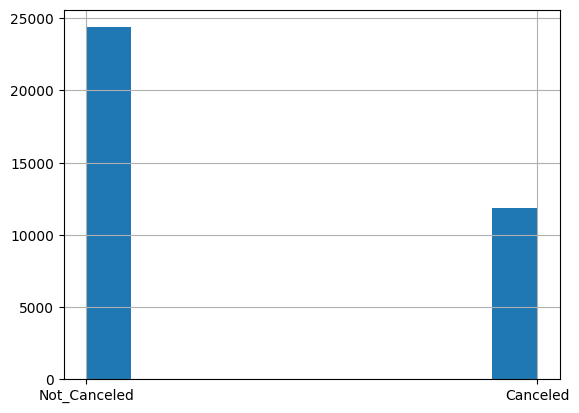

In [6]:
data["booking_status"].hist()

skewnes is present

In [10]:
x=data.drop(["booking_status","Booking_ID"],axis=1)
y=data["booking_status"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,stratify=y)

In [37]:
num_type=x_train.select_dtypes(include="number").columns
cat_type=x_train.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_type),
        ('cat', OrdinalEncoder(), cat_type),
    ])

In [35]:
lab_enc=LabelEncoder()
y_train=lab_enc.fit_transform(y_train)
y_val=lab_enc.transform(y_val)

Use another pipeline for dealing with imputing and handling missing values

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
smt = SMOTE(random_state=42)
lin_model=LogisticRegression()

"""This does not work with smote for some reason which i cant type here"""

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('smote', smt),
#                             ('model', lin_model)
#                           ])

'This does not work with smote for some reason which i cant type here'

In [38]:
from imblearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('model', lin_model)
                          ])

In [39]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

In [41]:
pred=pipeline.predict(x_val)

from sklearn.metrics import f1_score
f1_score(y_val,pred)


0.8238488271068637

Find if target encoding should be done inside the pipeline or not

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      2377
           1       0.88      0.78      0.82      4878

    accuracy                           0.78      7255
   macro avg       0.75      0.78      0.76      7255
weighted avg       0.80      0.78      0.78      7255



In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pred)

array([[1840,  537],
       [1085, 3793]], dtype=int64)